# Spam Detection Project Reproduce One-to-One

In [1]:
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Import the dataset:

In [53]:
os.chdir(r"C:\Users\serei\Desktop\Untitled Folder")

spam = pd.read_csv("data_old.csv")

In [54]:
spam2.var()

label_num           0.205892
word_freq_com       0.000056
word_freq_deal      0.000232
word_freq_please    0.000116
word_freq_gas       0.000138
word_freq_meter     0.000155
word_freq_daren     0.000049
word_freq_thanks    0.000051
word_freq_need      0.000053
dtype: float64

In [55]:
#spam.columns = names[0].values

spam.dropna(inplace=True)

In [28]:
spam.rename(columns = {'$':'dollar',
                       '€': 'euro',
                       '!': 'exclamation',
                       "@": 'at',
                      "?": "question"}, inplace = True)
spam.drop(columns=['Unnamed: 0', 'processed_text', 'word_count'], inplace = True)

In [56]:
column_names = spam.columns.tolist()
new_column_names = ['label_num'] + ['word_freq_' + column if column != 'label_num' else column for column in column_names[1:]]

# Rename the columns
spam.rename(columns=dict(zip(column_names, new_column_names)), inplace=True)



Let us check the distribution of spam and non-spam mails

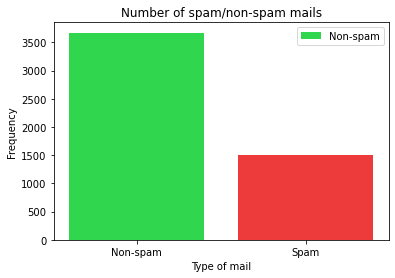

In [30]:
spam_count = spam["label_num"].value_counts()
perc_yes = round(spam_count[1] / len(spam) * 100, 2)
perc_no = round(spam_count[0] / len(spam) * 100, 2)

plt.bar(["Non-spam", "Spam"], spam_count, color=["#31d64f", "#ed3b3b"])
plt.title("Number of spam/non-spam mails")
plt.xlabel("Type of mail")
plt.ylabel("Frequency")
plt.legend(["Non-spam", "Spam"])
plt.show()

## Start from the most general model that contains all explanatory variables

Probit model

In [42]:
spam2 = spam[["label_num", "word_freq_com",  "word_freq_deal", "word_freq_please",
                "word_freq_gas", "word_freq_meter",  "word_freq_daren","word_freq_thanks", "word_freq_need"]]

In [43]:
formula = "label_num ~ " + " + ".join(spam2.columns[1:])

In [44]:
myprobit = sm.Probit.from_formula(formula, data=spam2).fit()
print(myprobit.summary())

Optimization terminated successfully.
         Current function value: nan
         Iterations 13
                          Probit Regression Results                           
Dep. Variable:              label_num   No. Observations:                 5171
Model:                         Probit   Df Residuals:                     5162
Method:                           MLE   Df Model:                            8
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                     nan
Time:                        18:17:48   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -3113.2
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept               nan        nan        nan        nan         nan         nan
word_freq_com  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2192: RuntimeWarning: divide by zero encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2192: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2193: RuntimeWarning: invalid value encountered in multiply
  return np.dot(-L*(L+XB)*X.T,X)


Logit model

In [45]:
mylogit = sm.Logit.from_formula(formula, data=spam2).fit()
print(mylogit.summary())

         Current function value: 0.419574
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              label_num   No. Observations:                 5171
Model:                          Logit   Df Residuals:                     5162
Method:                           MLE   Df Model:                            8
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                  0.3031
Time:                        18:17:51   Log-Likelihood:                -2169.6
converged:                      False   LL-Null:                       -3113.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0855      0.044      1.931      0.053      -0.001       0.172
word_freq_com       10.2039      4.370      2.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


# Significance test of models

Both models p-values are 0, so null hypothesis can be rejected. It means that the model`s coefficients are jointly significant

In [46]:
null_probit = sm.Probit(spam2["label_num"], sm.add_constant(pd.Series([1] * len(spam2)))).fit()
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Optimization terminated successfully.
         Current function value: 0.602049
         Iterations 4
Probit likelihood ratio test p-value: nan


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
spam2

,label_num,word_freq_ect,word_freq_com,word_freq_enron,word_freq_deal,word_freq_please,word_freq_gas,word_freq_meter,word_freq_cc,word_freq_pm,word_freq_daren,word_freq_thanks,word_freq_need,word_freq_corp,word_freq_volume,word_freq_know,word_freq_day
0,0,0.0,0.000000,0.020000,0.000000,0.020000,0.020000,0.02,0.000000,0.0,0.02,0.000000,0.000000,0.000000,0.020000,0.000000,0.0
1,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0,0.0,0.003311,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.003311,0.000000,0.000000,0.006623,0.0
3,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.027778,0.000000,0.000000,0.027778,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0.0,0.014599,0.014599,0.000000,0.000000,0.000000,0.00,0.007299,0.0,0.00,0.007299,0.000000,0.007299,0.007299,0.000000,0.0
5167,0,0.0,0.011628,0.011628,0.000000,0.000000,0.000000,0.00,0.003876,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5168,0,0.0,0.000000,0.000000,0.000000,0.000000,0.044776,0.00,0.000000,0.0,0.00,0.014925,0.000000,0.000000,0.000000,0.000000,0.0
5169,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [47]:
null_logit = sm.Logit(spam2["label_num"], sm.add_constant(pd.Series([1] * len(spam2)))).fit()
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Optimization terminated successfully.
         Current function value: 0.602049
         Iterations 5
Logit likelihood ratio test p-value: 0.0


## Stepwise regression

In [51]:
p_probit = myprobit.pvalues
spam_temp_probit = spam2.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = "label_num ~"
    
    for column in spam_temp_probit.columns[1:]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)

In [52]:
p_logit = mylogit.pvalues
spam_temp_logit = spam2.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = "label_num ~"
    
    for column in spam_temp_logit.columns[1:]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

word_freq_need
         Current function value: 0.419581
         Iterations: 35
4355.302679756403
word_freq_daren
Optimization terminated successfully.
         Current function value: 0.449601
         Iterations 19
4663.773162705365
Intercept


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyError: "['Intercept'] not found in axis"

### Interaction terms
Adding interaction terms and deleting insignificant ones for probit.

In [49]:
formula_interactions = "spam ~ word_freq_make + word_freq_address + word_freq_our + word_freq_over + word_freq_remove + word_freq_internet + word_freq_order + word_freq_free + word_freq_business + word_freq_you + word_freq_credit + word_freq_your + word_freq_000 + word_freq_money + word_freq_hp + word_freq_hpl + word_freq_george + word_freq_650 + word_freq_data + word_freq_85 + word_freq_technology + word_freq_pm + word_freq_meeting + word_freq_project + word_freq_re + word_freq_edu + word_freq_conference + char_freq_semicolon + char_freq_exclamation + char_freq_dollar + char_freq_hashtag + capital_run_length_longest + capital_run_length_total"
myprobit = sm.Probit.from_formula(formula_interactions, data=spam).fit()
p_probit = myprobit.pvalues
spam_temp_probit = spam.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_probit.columns[:-1]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)


PatsyError: Error evaluating factor: NameError: name 'word_freq_meeting' is not defined
    spam ~ word_freq_make + word_freq_address + word_freq_our + word_freq_over + word_freq_remove + word_freq_internet + word_freq_order + word_freq_free + word_freq_business + word_freq_you + word_freq_credit + word_freq_your + word_freq_000 + word_freq_money + word_freq_hp + word_freq_hpl + word_freq_george + word_freq_650 + word_freq_data + word_freq_85 + word_freq_technology + word_freq_pm + word_freq_meeting + word_freq_project + word_freq_re + word_freq_edu + word_freq_conference + char_freq_semicolon + char_freq_exclamation + char_freq_dollar + char_freq_hashtag + capital_run_length_longest + capital_run_length_total
                                                                                                                                                                                                                                                                                                                                                                                                               ^^^^^^^^^^^^^^^^^

In [42]:
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Probit likelihood ratio test p-value: 0.0


In [43]:
mylogit = sm.Logit.from_formula(formula_interactions, data=spam).fit()
p_logit = mylogit.pvalues
spam_temp_logit = spam.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_logit.columns[:-1]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

Optimization terminated successfully.
         Current function value: 0.205945
         Iterations 13


In [44]:
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Logit likelihood ratio test p-value: 0.0
